# Project Description 
You've been offered an internship in the analytical department at a company that its product is a movie ticket selling app.

# Project's Goal
 Help optimize marketing expenses, advise marketing experts how much money to invest and where.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Load, overview and prepare the data</h2>
</div>

Import libraries

In [1]:
pip install matplotlib==3.4.0

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.3 MB 1.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.dates as mdates
from matplotlib.ticker import StrMethodFormatter
import plotly.express as px

In [3]:
#ignorning warnings
warnings.simplefilter('ignore')

make a try-except block in order to avoid file path error when working both locally and remotely.

In [4]:
try:
    visits = pd.read_csv('visits_log_us.csv')
    orders = pd.read_csv('orders_log_us.csv')
    expenses = pd.read_csv('costs_us.csv')
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv')
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    expenses = pd.read_csv('/datasets/costs_us.csv')

Check the tables first 5 rows to see the general information.

In [5]:
visits.head()

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

Checking for amount of valunes in device column to see possible conversion to category dtype.

In [6]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [7]:
orders.head()

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

In [8]:
expenses.head()

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

Check the tables general structure

In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [11]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


checking for duplicates

In [12]:
visits.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

In [14]:
expenses.duplicated().sum()

0

#### After having a look at the table's general information, We discovered useful information regarding our data.
##### there are no missing values in our data.
##### there are no duplicates on our data.
##### All columns will be lowercased.
##### There are several columns that their name should be changed.
all columns that contain space in their name (visits.start ts, visits.end ts, visits.source id, orders.buy ts)
will have their space replaced with _
##### There are several columns that their datatype should be changed.
All the date columns (visits.start ts, visits.end ts, orders.Buy ts, expenses.dt) are not in date type and will be changed from object to date type to have fitting type & for optimization

visits.Device can be changed to a category type instead of object type to optimize our data.

Columns lower-casing

In [15]:
visits.columns = [x.lower() for x in visits.columns]
orders.columns = [x.lower() for x in orders.columns]
expenses.columns = [x.lower() for x in expenses.columns]

columns's name space replacement

In [16]:
visits.columns = visits.columns.str.replace(' ','_')
orders.columns = orders.columns.str.replace(' ','_')

columns data types conversion

In [17]:
visits['start_ts'] =  pd.to_datetime(visits['start_ts'])
visits['end_ts'] =  pd.to_datetime(visits['end_ts'])
orders['buy_ts'] =  pd.to_datetime(orders['buy_ts'])
expenses['dt'] =  pd.to_datetime(expenses['dt'])

In [18]:
visits['device'] = visits['device'].astype('category') 

### Coclusion

We loaded & reviewed our data, checked for no duplicates or missing data.

Removed spaces from columns names & lowercased columns names.
We made datatype conversion for all date columns, to date type for further date calculations, date slicing and for data optimizing (object type costs us more memory).

We also changed visits.device column type from object to category as it has 2 categorical values & for optimizing our memory usage.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Metrics calculations</h2>
</div>

In [19]:
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

### Product

- **How many people use it every day, week, and month?**

#### DAU:

creating separate columns for year, month, and week values.

In [20]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month']  = visits['start_ts'].astype('datetime64[M]')
visits['session_week']  = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date

calculating DAU

In [21]:
dau=visits.groupby(visits['session_date'])['uid'].nunique().reset_index()
dau.columns = ['date','user_count']
dau['date'] =  pd.to_datetime(dau['date'])
dau_avg = dau.user_count.mean()
dau_max = dau.user_count.max()
dau_min = dau.user_count.min()
dau_med = dau.user_count.median()

The median DAU

In [22]:
int(dau_med)

921

the mean DAU:

In [23]:
int(dau_avg)

907

the min DAU

In [24]:
int(dau_min)

1

the max DAU

In [25]:
int(dau_max)

3319

plotting DAU

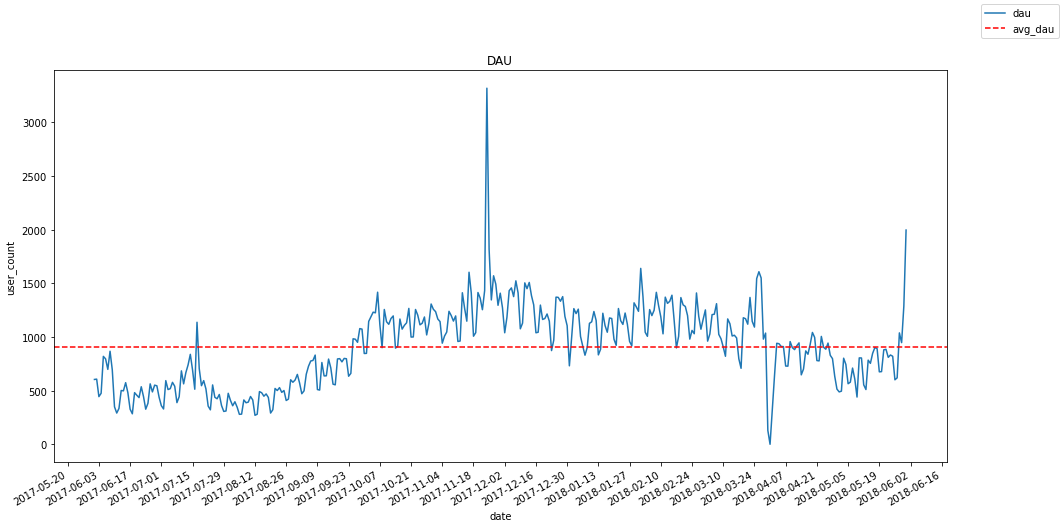

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
ax.set_title('DAU')
chart = sns.lineplot(data=dau, ax=ax,x="date",y="user_count")
#configuring the interval to 2 weeks for better visualization
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
#drawing mean line
chart.axhline(dau_avg,ls='--', c='red')
#xlabel date formatting
fig.autofmt_xdate()
fig.legend(labels=['dau','avg_dau']);

##### Description:

This graph shows the amount of daily users of the product, with the rounded mean being 907,median being 921, min being 1, and max being 3319.

We see Our peak amount of visitors happend at the end of November, which can be explained by a special sale for chrismas, or some kind of chrismas related event in the product that led to such peak.

Our lowest amount of visitors are 1 at April 2018, which can be explained by a crash, a maintenance or some kind of technical issue that caused the product to become inaccessible(could be intentional for a maintenance).

Our median is a bit higher than our mean, which means our distribution is a bit skewed to the left (negatively skewed). 

#### WAU

In [27]:
wau=visits.groupby(visits['session_week'])['uid'].nunique().reset_index()
wau.columns = ['date','user_count']
wau['date'] =  pd.to_datetime(wau['date'])
wau_avg = wau.user_count.mean()
wau_max = wau.user_count.max()
wau_min = wau.user_count.min()
wau_med = wau.user_count.median()

The mean WAU:

In [28]:
int(wau_avg)

5724

The median WAU:

In [29]:
int(wau_med)

5894

the min WAU:

In [30]:
int(wau_min)

1997

the max WAU:

In [31]:
int(wau_max)

10716

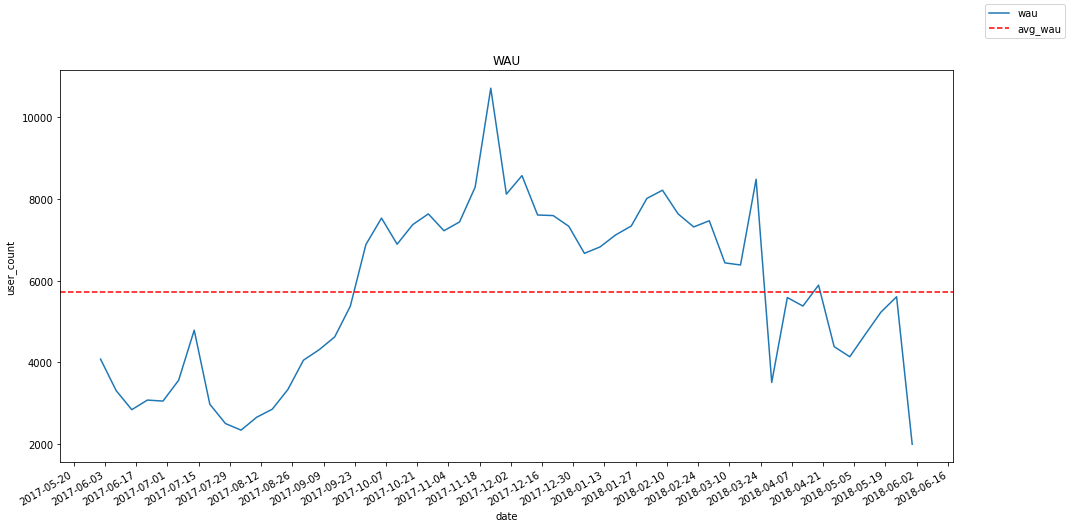

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
ax.set_title('WAU')
chart = sns.lineplot(data=wau, ax=ax,x="date",y="user_count")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
#drawing mean line
chart.axhline(wau_avg,ls='--', c='red')
#xlabel date formatting
fig.autofmt_xdate()
fig.legend(labels=['wau','avg_wau']);

##### Description:
This graph shows the amount of weekly users of the product, with the rounded mean being 5724,median being 5894, min being 1997, and max being 10716.

We see our peak amount of visitors happend at the end of November, just like in the daily user analysis, which can be explained by a special sale for chrismas, or some kind of chrismas related event in the product that led to such peak.

Our lowest amount of visitors are 1997 at the end of May 2018, which can be explained by partial data for the last week.

The minimal DAU happaned at April 2018, and as we can see the drop in our graph, it didnt drop to 0 - which means there was a day with 1 user - it makes it easier to belive that a technical error accoured or some kind of maintenance.

Our median is a bit higher than our mean, which means our distribution is a bit skewed to the left (negatively skewed).

#### MAU

In [33]:
mau=visits.groupby(visits['session_month'])['uid'].nunique().reset_index()
mau.columns = ['date','user_count']
mau['date'] =  pd.to_datetime(mau['date'])
mau_avg = mau.user_count.mean()
mau_max = mau.user_count.max()
mau_min = mau.user_count.min()
mau_med = mau.user_count.median()

The mean MAU:

In [34]:
int(mau_avg)

23228

The median MAU:

In [35]:
int(mau_med)

24240

The min MAU:

In [36]:
int(mau_min)

11631

The max MAU:

In [37]:
int(mau_max)

32797

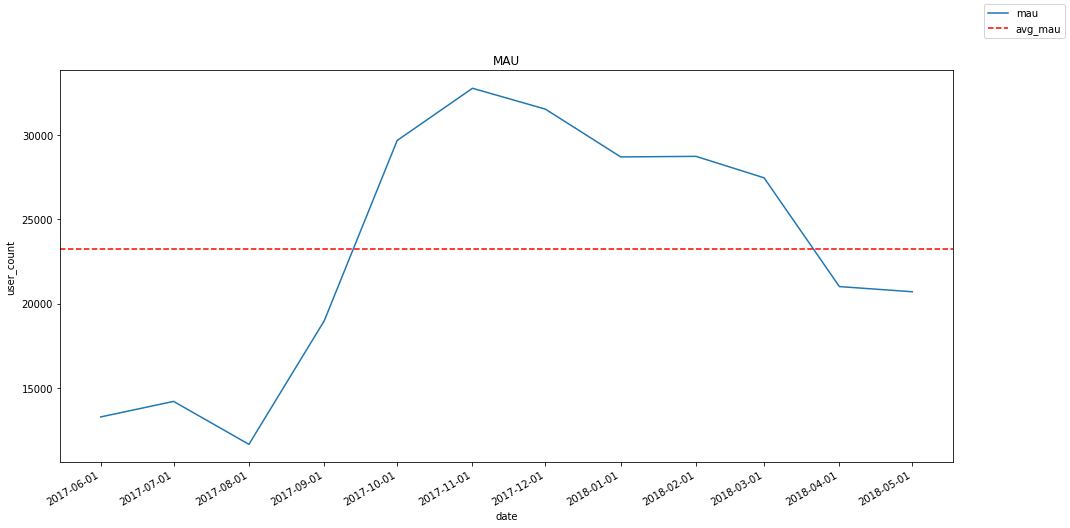

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
ax.set_title('MAU')
chart = sns.lineplot(data=mau, ax=ax,x="date",y="user_count")
ax.set(xticks=mau.date.values)
#drawing mean line
chart.axhline(mau_avg,ls='--', c='red')
#xlabel date formatting
fig.autofmt_xdate()
fig.legend(labels=['mau','avg_mau']);

##### Description:
This graph shows the amount of monthly users of the product, with the rounded mean being 23228,median being 24240, min being 11631, and max being 32797.

We see our peak amount of visitors happend at November, just like in the daily & weekly user analysis, which can be explained by a special sale for chrismas, or some kind of event in the product that led to such peak.

Our lowest amount of visitors are 11631 at August 2018, which correlates with low values in that time span both in DAU and WAU.

We can assume people were going to less movies in summer, and by the end of the year & start of the year there are more visitors due to new movies and holiday events.

Our median is a bit higher than our mean, which means our distribution is a bit skewed to the left (negatively skewed).

#### Conclusion
After calculating DAU, WAU and MAU, our main conclusion is : visitors use the app less(watch less movies) at summer times, and use more (watch more movies) at the end of the year and at the start of the year - possibly due to holidays or new released movies.

- **How many sessions are there per day? (One user might have more than one session.)?**

In [39]:
s_per_day = visits.groupby(visits['session_date'])['uid'].count().reset_index()
s_per_day.columns = ['session_date','total_session_count']
s_per_day['session_date'] = pd.to_datetime(s_per_day['session_date'])

creating average sessions per user per day column

In [40]:
s_per_day['sessions_per_user'] = s_per_day['total_session_count'] / dau['user_count']

checking the first rows of the df

In [41]:
s_per_day.head()

session_date  total_session_count  sessions_per_user
0   2017-06-01                  664           1.097521
1   2017-06-02                  658           1.082237
2   2017-06-03                  477           1.071910
3   2017-06-04                  510           1.071429
4   2017-06-05                  893           1.089024

average sessions per day:

In [42]:
avg_d_sess = int(s_per_day.total_session_count.mean())

In [43]:
avg_d_sess

987

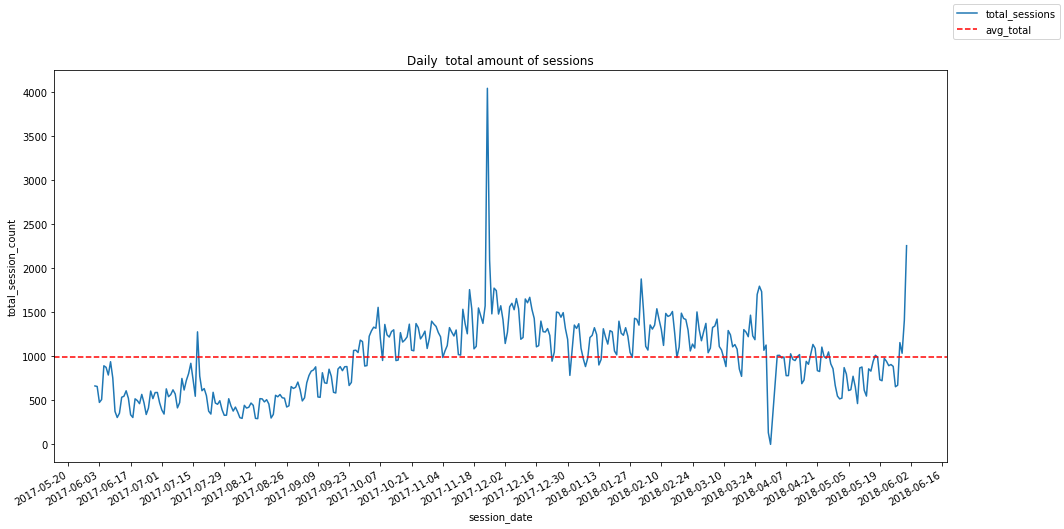

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
ax.set_title('Daily  total amount of sessions')
chart = sns.lineplot(data=s_per_day, ax=ax,x="session_date",y="total_session_count")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
#drawing mean line
chart.axhline(avg_d_sess,ls='--', c='red')
#xlabel date formatting
fig.autofmt_xdate()
fig.legend(labels=['total_sessions','avg_total']);

plotting comparison between total sessions per day to our DAU (unique sessions)

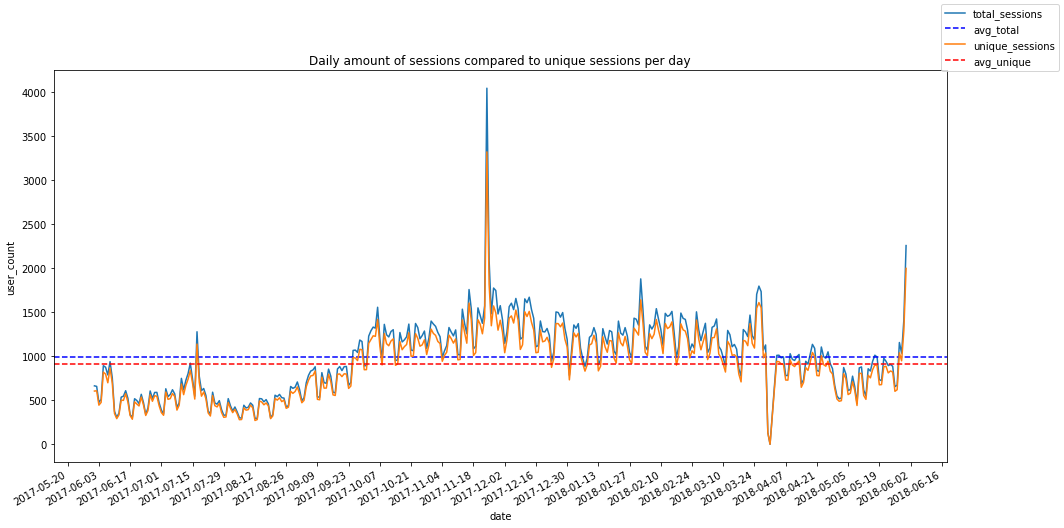

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
ax.set_title('Daily amount of sessions compared to unique sessions per day')
chart = sns.lineplot(data=s_per_day, ax=ax,x="session_date",y="total_session_count")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
#drawing mean line
chart.axhline(avg_d_sess,ls='--', c='blue')
chart2 = sns.lineplot(data=dau, ax=ax,x="date",y="user_count")
chart2.axhline(dau_avg,ls='--', c='red')
#xlabel date formatting
fig.autofmt_xdate()
fig.legend(labels=['total_sessions','avg_total','unique_sessions','avg_unique']);

##### Description & conclusion:
The first graph shows the total sessions per day, and its average value.

The second graph shows the comparison of the total sessions per day and the unique sessions per day.
As we can see, the graphs behave the same, with a bit more size to the total sessions - which makes sense with our sessions_per_user column, that shows users have on average between 1 to 1.2 sessions per day.

The average amount of total sessions per day is 987, the average amount of unique sessions per day (dau) is 907.

- **What is the length of each session?**

creating session length in minutes column

In [46]:
visits['session_duration_mins'] = (visits['end_ts'] - visits['start_ts']).dt.seconds / 60

checking how many rows have their start_ts > end_ts , which is illogical

In [47]:
visits.query('start_ts > end_ts')

device              end_ts  source_id            start_ts  \
4181    desktop 2018-03-25 03:18:00          3 2018-03-25 03:50:00   
177972  desktop 2018-03-25 03:09:00          9 2018-03-25 03:55:00   

                         uid  session_year session_month session_week  \
4181    13092152539246794986          2018    2018-03-01   2018-03-22   
177972   4621202742905035453          2018    2018-03-01   2018-03-22   

       session_date  session_duration_mins  
4181     2018-03-25                 1408.0  
177972   2018-03-25                 1394.0

removing those rows as their session duration & dates are illogical.

In [48]:
visits = visits.drop(visits[visits.start_ts > visits.end_ts].index)

Average session length:

In [49]:
avg_length = visits.session_duration_mins.mean()

In [50]:
avg_length

10.717371456342736

checking amount of values of durations

In [51]:
visits.session_duration_mins.value_counts()

1.0      53029
0.0      35794
2.0      35748
3.0      26672
4.0      21085
         ...  
335.0        1
484.0        1
248.0        1
333.0        1
524.0        1
Name: session_duration_mins, Length: 310, dtype: int64

checking the most common value, mode:

In [52]:
visits.session_duration_mins.mode()

0    1.0
dtype: float64

checking the distribution of the session lengths

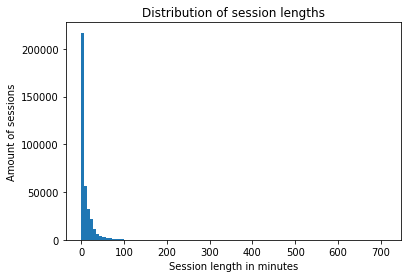

In [53]:
ax = visits['session_duration_mins'].plot(kind = 'hist',bins=100)
#ax = df2.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Video streaming dropout by category')
ax.set_xlabel("Session length in minutes")
ax.set_ylabel("Amount of sessions")
ax.set_title('Distribution of session lengths');

##### Description & conclusion:
We see by the value_counts method and by looking at our histogram that we have alot of 0 values -  that can be created by the app crashing when it loads, or the user clicks and closes immedietly - I would send this to the data providers to check for data integrity about the high amount of 0 length of sessions, and some very high values that skew our data - those long sessions are probably idle sessions where users forgot to close the app. we cant use the mean in our case - where our distribution is not close to being normal, thats why the mode makes more sense to be treated as a valuable number. the mode is 1 minute - the most common length for sessions is 1 minute.

- **How often do users come back?**

In [54]:
first_visit=visits.groupby(['uid'])['session_date'].min().reset_index()
first_visit.columns = ['uid', 'first_session']

In [55]:
#merging the first visit per user to the original dataframe
visits=visits.merge(first_visit, how='inner',on=['uid'])

defining our cohort to monthly and calculating age (session date - first session date)

In [56]:
first_visit

uid first_session
0             11863502262781    2018-03-01
1             49537067089222    2018-02-06
2            297729379853735    2017-06-07
3            313578113262317    2017-09-18
4            325320750514679    2017-09-30
...                      ...           ...
228164  18446403737806311543    2017-11-30
228165  18446424184725333426    2017-12-06
228166  18446556406699109058    2018-01-01
228167  18446621818809592527    2017-12-27
228168  18446676030785672386    2017-10-04

[228169 rows x 2 columns]

In [57]:
visits['cohort'] = visits['first_session'].astype('datetime64[M]')

In [58]:
visits['age'] = ((pd.to_datetime(visits['session_month']) - pd.to_datetime(visits['cohort'])) / np.timedelta64(1,'M'))\
                                                                                            .round().astype('int')

creating a pivot table for cohorts and users by cohort's age

In [59]:
cohorts = visits.pivot_table(
                  index='cohort',
                  columns='age',
                  values='uid',
                  aggfunc='nunique').fillna(0)

dividing  columns for all ages by column when age=0 for % presentation

In [60]:
retention_prec=cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention_prec

age          0         1         2         3         4         5         6   \
cohort                                                                        
2017-06-01  1.0  0.078664  0.053775  0.061392  0.068557  0.071423  0.061015   
2017-07-01  1.0  0.056088  0.051294  0.056164  0.058219  0.048174  0.045358   
2017-08-01  1.0  0.076908  0.062862  0.062764  0.050093  0.044004  0.036342   
2017-09-01  1.0  0.085489  0.069205  0.050706  0.039392  0.037835  0.035860   
2017-10-01  1.0  0.078608  0.052239  0.038958  0.034261  0.032221  0.021365   
2017-11-01  1.0  0.078281  0.044113  0.038682  0.033727  0.023415  0.021800   
2017-12-01  1.0  0.055802  0.037993  0.031107  0.020263  0.019036  0.000000   
2018-01-01  1.0  0.059715  0.039339  0.024973  0.020244  0.000000  0.000000   
2018-02-01  1.0  0.057080  0.025454  0.020093  0.000000  0.000000  0.000000   
2018-03-01  1.0  0.041818  0.027053  0.000000  0.000000  0.000000  0.000000   
2018-04-01  1.0  0.048380  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-05-01  1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

age               7         8         9         10        11  
cohort                                                        
2017-06-01  0.057772  0.052342  0.050833  0.040652  0.044951  
2017-07-01  0.045738  0.038813  0.028615  0.027473  0.000000  
2017-08-01  0.039485  0.027895  0.026029  0.000000  0.000000  
2017-09-01  0.024186  0.022809  0.000000  0.000000  0.000000  
2017-10-01  0.020364  0.000000  0.000000  0.000000  0.000000  
2017-11-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2017-12-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-01-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-02-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-03-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-04-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-05-01  0.000000  0.000000  0.000000  0.000000  0.000000

plotting heatmap to visualize our pivot table

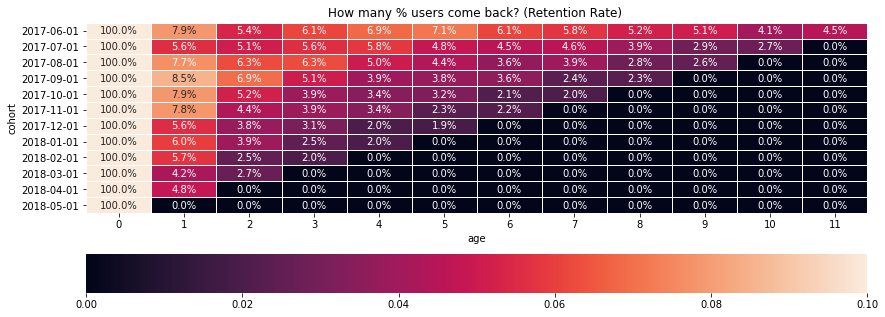

In [61]:
retention_prec.index=retention_prec.index.astype(str)
plt.figure(figsize=(14,5))
sns.heatmap(retention_prec, annot=True, fmt='.1%', linewidths=1, linecolor='white',  vmax=0.1, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'How many % users come back? (Retention Rate) ');

Checking the overall mean for every cohort

In [62]:
retention_prec['mean_retention'] = retention_prec.iloc[:, 1:].mean(axis=1) * 100

In [63]:
retention_prec

age           0         1         2         3         4         5         6  \
cohort                                                                        
2017-06-01  1.0  0.078664  0.053775  0.061392  0.068557  0.071423  0.061015   
2017-07-01  1.0  0.056088  0.051294  0.056164  0.058219  0.048174  0.045358   
2017-08-01  1.0  0.076908  0.062862  0.062764  0.050093  0.044004  0.036342   
2017-09-01  1.0  0.085489  0.069205  0.050706  0.039392  0.037835  0.035860   
2017-10-01  1.0  0.078608  0.052239  0.038958  0.034261  0.032221  0.021365   
2017-11-01  1.0  0.078281  0.044113  0.038682  0.033727  0.023415  0.021800   
2017-12-01  1.0  0.055802  0.037993  0.031107  0.020263  0.019036  0.000000   
2018-01-01  1.0  0.059715  0.039339  0.024973  0.020244  0.000000  0.000000   
2018-02-01  1.0  0.057080  0.025454  0.020093  0.000000  0.000000  0.000000   
2018-03-01  1.0  0.041818  0.027053  0.000000  0.000000  0.000000  0.000000   
2018-04-01  1.0  0.048380  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-05-01  1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

age                7         8         9        10        11  mean_retention  
cohort                                                                        
2017-06-01  0.057772  0.052342  0.050833  0.040652  0.044951        5.830688  
2017-07-01  0.045738  0.038813  0.028615  0.027473  0.000000        4.144873  
2017-08-01  0.039485  0.027895  0.026029  0.000000  0.000000        3.876204  
2017-09-01  0.024186  0.022809  0.000000  0.000000  0.000000        3.322557  
2017-10-01  0.020364  0.000000  0.000000  0.000000  0.000000        2.527411  
2017-11-01  0.000000  0.000000  0.000000  0.000000  0.000000        2.181978  
2017-12-01  0.000000  0.000000  0.000000  0.000000  0.000000        1.492725  
2018-01-01  0.000000  0.000000  0.000000  0.000000  0.000000        1.311560  
2018-02-01  0.000000  0.000000  0.000000  0.000000  0.000000        0.932968  
2018-03-01  0.000000  0.000000  0.000000  0.000000  0.000000        0.626107  
2018-04-01  0.000000  0.000000  0.000000  0.000000  0.000000        0.439817  
2018-05-01  0.000000  0.000000  0.000000  0.000000  0.000000        0.000000

##### Description & conclusion:

This graph shows us the % amount of users that come back monthly for every cohort.

We can tell our first cohort (6/2017) has the highest retention rate overall, but the cohort with highest retention on the 1st month is 9/2017.

the cohort with the highest retention on the 2nd month is also September 2017 (9/2017).

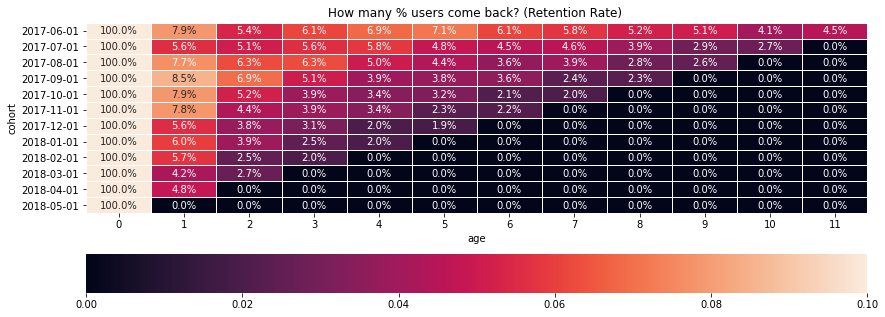

In [64]:
visits['age'] = ((pd.to_datetime(visits['session_month']) - pd.to_datetime(visits['cohort'])) / np.timedelta64(1,'M'))\
                                                                                            .round().astype('int')
cohorts = visits.pivot_table(
                  index='cohort',
                  columns='age',
                  values='uid',
                  aggfunc='nunique').fillna(0)

retention_prec=cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention_prec.index=retention_prec.index.astype(str)
plt.figure(figsize=(14,5))
sns.heatmap(retention_prec, annot=True, fmt='.1%', linewidths=1, linecolor='white',  vmax=0.1, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'How many % users come back? (Retention Rate) ')
plt.show()

### Sales

- **When do people start buying?**

creating 2 new dataframes to combine first_session and first_buy per buyer

In [65]:
first_order=orders.groupby(['uid'])['buy_ts'].min().reset_index()
first_order.columns=['uid','first_buy']
first_session = visits.groupby(['uid'])['first_session'].min().reset_index()

inner join because we want only uid of people with a first_buy - customers.

In [66]:
first_both = first_session.merge(first_order, how='inner', on=['uid'])

In [67]:
first_both['first_buy'] = pd.to_datetime(first_both['first_buy']).dt.date
first_both['first_session'] = pd.to_datetime(first_both['first_session']).dt.date
first_both['first_buy'] = pd.to_datetime(first_both['first_buy'])
first_both['first_session'] = pd.to_datetime(first_both['first_session'])

calculating days to conversion

In [68]:
first_both['conversion']=((pd.to_datetime(first_both['first_buy'])-pd.to_datetime(first_both['first_session']))/np.timedelta64(1,'D')).astype('int')

overview of the new df:

In [69]:
first_both.head()

uid first_session  first_buy  conversion
0   313578113262317    2017-09-18 2018-01-03         107
1  1575281904278712    2017-06-03 2017-06-03           0
2  2429014661409475    2017-10-11 2017-10-11           0
3  2464366381792757    2018-01-27 2018-01-28           1
4  2551852515556206    2017-11-24 2017-11-24           0

median conversion time

In [70]:
first_both.conversion.median()

0.0

mode conversion time (most common)

In [71]:
first_both.conversion.mode()

0    0
dtype: int64

checking the inital disribution of conversion and its statistics:

In [72]:
first_both.conversion.value_counts()

0      25039
1       1966
2        685
3        452
4        386
       ...  
329        1
309        1
341        1
343        1
282        1
Name: conversion, Length: 349, dtype: int64

In [73]:
first_both.conversion.describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion, dtype: float64

We see most of our customers are converted at the same day, that makes sense -  people enter and buys their ticket.

categorizing our conversion times, will plot it afterwards.

In [74]:
first_both['conversion_time'] = pd.cut(first_both['conversion'], bins=[0,0.9,1,2,7,14,28,363], include_lowest=True,
labels=['0d', '1d', '2d', '3-7d','8-14d','15-28d','29-363d'])

plot the distribution of conversion:

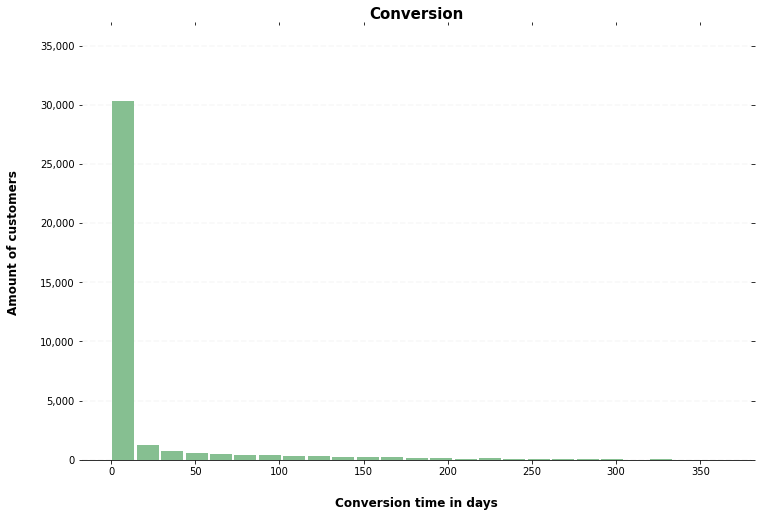

In [75]:
ax = first_both.hist(column='conversion', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9 )

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    # Set title
    x.set_title("Conversion",weight='bold',size=15)
    # Set x-axis label
    x.set_xlabel("Conversion time in days", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Amount of customers", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

##### Description:
This graph shows our conversion time disribution among our customers, we can see the vast majority are converted after 0 days ( at the same day), with few customers converting afterwards.

0 days conversion time is also our median and mode value. we find this logical as people tend to enter the app and buy their ticket on the same day.



plotting conversion by categories:

In [76]:
categories = first_both.groupby('conversion_time')['uid'].count().reset_index()
categories.columns = ['conversion_time','customers_count']

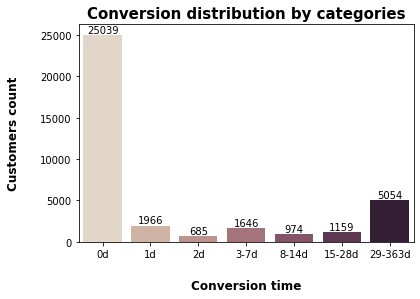

In [77]:
ax = sns.barplot(x="conversion_time",y="customers_count" , palette="ch:.25", data=categories)
ax.bar_label(ax.containers[0])
ax.set_title("Conversion distribution by categories",weight='bold',size=15)
ax.set_xlabel("Conversion time", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Customers count", labelpad=20, weight='bold', size=12);

##### Description:
This graph shows us our conversion distribution more accurately, as it is splitted between categories.

We see most customers convert in 0 days, and the second highest category convert after a month +, this could happen if customers were looking at movies for the future, or movies that are maybe not released yet.

% of total users that are converted (made a purchase):

In [78]:
print(' The overall conversion is {:.1%}'.format(first_both['uid'].nunique()/first_session['uid'].nunique()))

 The overall conversion is 16.0%


##### Conclusion:
We conclude the vast majority converts (starts to buy) after 0 days.
there are customers that buys after a long period of time, which can be explain by viewing option for movies for the future, checking unreleased movies and such.

Our overall conversion is 16% (36523 customers out of 228169 users)

- **How many orders do they make during a given period of time?**

In [79]:
#defining cohort month through first purchase
first_both['first_order_month']=first_both['first_buy'].astype('datetime64[M]')
#adding month column per order
orders['month']=orders['buy_ts'].astype('datetime64[M]')

making a df with both first_order_month and order_month.

In [80]:
new_orders = orders.merge(first_both,on='uid')

In [81]:
cohort_buys = first_both.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_buys.columns=['first_order_month','cohort_size']

viewing cohort_buys df

In [82]:
cohort_buys

first_order_month  cohort_size
0         2017-06-01         2023
1         2017-07-01         1923
2         2017-08-01         1370
3         2017-09-01         2581
4         2017-10-01         4340
5         2017-11-01         4081
6         2017-12-01         4383
7         2018-01-01         3373
8         2018-02-01         3651
9         2018-03-01         3533
10        2018-04-01         2276
11        2018-05-01         2988
12        2018-06-01            1

In [83]:
#calculating number of purchases for cohort and month
cohort2=new_orders.groupby(['first_order_month','month'])['uid'].count().reset_index()
cohort2.columns=['first_order_month','month','orders']
#combining cohort2 with cohort_buys
cohort2=cohort2.merge(cohort_buys,on=['first_order_month'])
cohort2['age_month'] = ((cohort2['month'] - cohort2['first_order_month']) / np.timedelta64(1,'M')).round()
cohort2['orders_per_buyer']=cohort2['orders']/cohort2['cohort_size']

our new df's structure:

In [84]:
cohort2.head()

first_order_month      month  orders  cohort_size  age_month  \
0        2017-06-01 2017-06-01    2354         2023        0.0   
1        2017-06-01 2017-07-01     177         2023        1.0   
2        2017-06-01 2017-08-01     174         2023        2.0   
3        2017-06-01 2017-09-01     226         2023        3.0   
4        2017-06-01 2017-10-01     292         2023        4.0   

   orders_per_buyer  
0          1.163618  
1          0.087494  
2          0.086011  
3          0.111715  
4          0.144340

creating a pivot table for clear cohort analysis

In [85]:
cohort2_piv=cohort2.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum')
cohort2_piv.round(2).fillna('')

age_month          0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
first_order_month                                                               
2017-06-01         1.16  0.09  0.09  0.11  0.14  0.11  0.14  0.09   0.1  0.08   
2017-07-01         1.14  0.05  0.06  0.05  0.04  0.04  0.03  0.03  0.03  0.01   
2017-08-01         1.12  0.08  0.07  0.06  0.06  0.05  0.04  0.06  0.03  0.03   
2017-09-01         1.14  0.08  0.06  0.06  0.03  0.04  0.04  0.02  0.02         
2017-10-01         1.14  0.07  0.04  0.03  0.03  0.02  0.02  0.03               
2017-11-01         1.18   0.1  0.04  0.05  0.03  0.01  0.02                     
2017-12-01         1.15  0.06  0.05  0.04  0.02  0.02                           
2018-01-01         1.12  0.07  0.05  0.02  0.02                                 
2018-02-01         1.12  0.06  0.02  0.02                                       
2018-03-01         1.17  0.05  0.05                                             
2018-04-01         1.10  0.09                                                   
2018-05-01         1.09                                                         
2018-06-01         1.00                                                         

age_month          10.0  11.0  
first_order_month              
2017-06-01         0.05  0.04  
2017-07-01         0.03        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01                     
2018-06-01

creating another pivot table using cumsum to see which cohort will be outrunning the others in term of cumulative purchases per user

In [86]:
cohort2_piv=cohort2.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum').cumsum(axis=1)
cohort2_piv.round(2).fillna('')

age_month          0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
first_order_month                                                               
2017-06-01         1.16  1.25  1.34  1.45  1.59   1.7  1.84  1.92  2.03   2.1   
2017-07-01         1.14  1.19  1.25  1.31  1.34  1.39  1.42  1.44  1.47  1.49   
2017-08-01         1.12   1.2  1.27  1.33  1.39  1.44  1.47  1.53  1.56   1.6   
2017-09-01         1.14  1.22  1.28  1.35  1.37  1.42  1.46  1.48   1.5         
2017-10-01         1.14  1.22  1.25  1.28  1.31  1.34  1.35  1.38               
2017-11-01         1.18  1.28  1.32  1.37  1.41  1.42  1.45                     
2017-12-01         1.15  1.21  1.26   1.3  1.32  1.34                           
2018-01-01         1.12  1.19  1.24  1.25  1.28                                 
2018-02-01         1.12  1.18  1.21  1.22                                       
2018-03-01         1.17  1.22  1.27                                             
2018-04-01         1.10  1.18                                                   
2018-05-01         1.09                                                         
2018-06-01         1.00                                                         

age_month          10.0  11.0  
first_order_month              
2017-06-01         2.15  2.19  
2017-07-01         1.51        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01                     
2018-06-01

##### Conclusion:
We conclude users between 1-1.18 orders on their first month, heavily decreasing to 0.1 and lower orders on their second month and further on.
    
The cohort that is outrunning the others in term of cumulative purchases per user is 06/2017, followed by 08/2017.
    
We can also tell the highest value for orders on the first month happens on November 2017.
    

- **What is the average purchase size?**

The average purchase size

In [87]:
orders.revenue.mean()

4.999646930477041

Cohort analysis on averge pay:

In [88]:
avg_cohort=new_orders.groupby(['first_order_month','month'])['revenue'].mean().reset_index()
avg_cohort['age_month'] = ((avg_cohort['month'] - avg_cohort['first_order_month']) / np.timedelta64(1,'M')).round()

In [89]:
avg_cohort_piv=avg_cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='revenue', 
    aggfunc='mean')
avg_cohort_piv.round(2).fillna('')

age_month          0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0   \
first_order_month                                                          
2017-06-01         4.06   5.55   5.09   8.55   7.08   6.83   6.97   6.76   
2017-07-01         5.29   6.45   9.99   6.64   4.72   3.66   3.79   5.45   
2017-08-01         4.72   5.99   6.28   6.62   7.96   6.27   5.89   7.11   
2017-09-01         4.97  13.17   8.35  62.57  15.43  15.32  16.77  11.21   
2017-10-01         4.37   7.41   5.13   5.59    5.1   5.07   4.28   4.01   
2017-11-01         4.37    4.1   4.47   6.28   4.44   3.73    4.6          
2017-12-01         4.11   4.23  20.07  26.08  15.95  14.11                 
2018-01-01         3.69   4.44   6.45   7.52   2.71                        
2018-02-01         3.71   4.58   3.45   3.87                               
2018-03-01         4.14   5.97   6.33                                      
2018-04-01         4.25    6.2                                             
2018-05-01         4.29                                                    
2018-06-01         3.42                                                    

age_month          8.0    9.0    10.0  11.0  
first_order_month                            
2017-06-01         5.28   8.01  12.04  6.04  
2017-07-01         5.35  11.79   5.65        
2017-08-01          8.7    5.6               
2017-09-01         7.79                      
2017-10-01                                   
2017-11-01                                   
2017-12-01                                   
2018-01-01                                   
2018-02-01                                   
2018-03-01                                   
2018-04-01                                   
2018-05-01                                   
2018-06-01

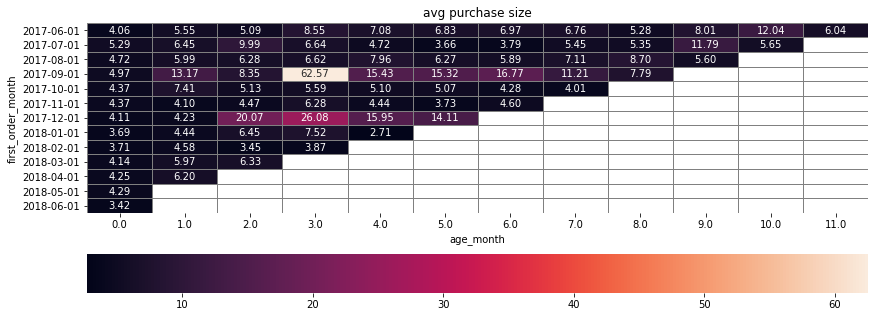

In [90]:
avg_cohort_piv.index=avg_cohort_piv.index.astype(str)
plt.figure(figsize=(14,5))
sns.heatmap(avg_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
).set(title ='avg purchase size');

##### Conclusion:

Our average purchase size is 4.999, or 5 if rounded.

We can tell by our cohort analysis that a large peak happend by the third month of September 2017 cohort(09/2017).

We can assume some kind of a bundle-sale was offered for christmas, or some kind of special offer for new movies that are coming up, family discount or such.



- **How much money do they bring? (LTV)**

In [91]:
ltv_cohort=new_orders.groupby(['first_order_month','month'])['revenue'].sum().reset_index()

merging with cohort size df (cohort_buys)

In [92]:
ltv_cohort=ltv_cohort.merge(cohort_buys,on=['first_order_month'])

calculating age and LTV

In [93]:
ltv_cohort['age']=((ltv_cohort['month'] - ltv_cohort['first_order_month']) / np.timedelta64(1,'M')).round()
ltv_cohort['ltv']=ltv_cohort['revenue']/ltv_cohort['cohort_size']

overviewing our ltv_cohort df

In [94]:
ltv_cohort.head()

first_order_month      month  revenue  cohort_size  age       ltv
0        2017-06-01 2017-06-01  9557.49         2023  0.0  4.724414
1        2017-06-01 2017-07-01   981.82         2023  1.0  0.485329
2        2017-06-01 2017-08-01   885.34         2023  2.0  0.437637
3        2017-06-01 2017-09-01  1931.30         2023  3.0  0.954671
4        2017-06-01 2017-10-01  2068.58         2023  4.0  1.022531

creating a pivot table & plotting heatmap

In [95]:
ltv_cohort_piv=ltv_cohort.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)

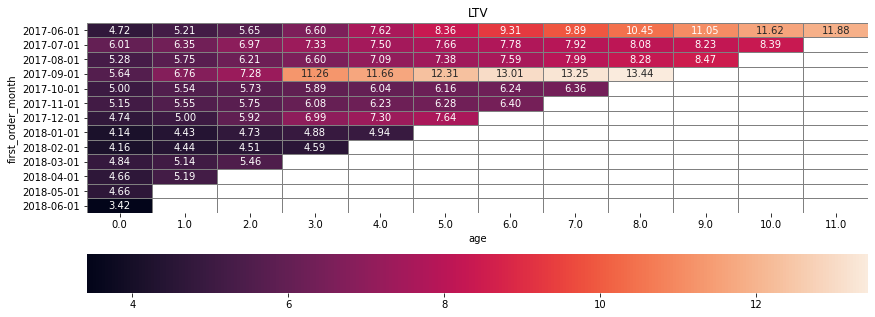

In [96]:
ltv_cohort_piv.index=ltv_cohort_piv.index.astype(str)
plt.figure(figsize=(14,5))
sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
).set(title ='LTV');

##### Description & Conclusion:
This heatmap shows us the LTV per customer by monthly cohorts.

We can conclude the cohort of September 2017 (09/2017) has the best cumulative LTV after 2 months and on.

This correlates with the average purchase size, that also showed a peak in this cohort after 3 months.

### Marketing

- **How much money was spent? Overall/per source/over time**

In [97]:
expenses.columns=['source_id','date','costs']

Overall expenses:

In [98]:
print('Total expenses: {}'.format(expenses['costs'].sum()))

Total expenses: 329131.62


Per source expenses:

In [99]:
expenses_per_source=expenses.groupby(['source_id'])['costs'].sum().reset_index()

viewing the costs per source:

In [100]:
expenses_per_source.sort_values(by='costs',ascending=False)

source_id      costs
2          3  141321.63
3          4   61073.60
4          5   51757.10
1          2   42806.04
0          1   20833.27
6         10    5822.49
5          9    5517.49

defining main source per user as first source for further calculations and to get the revenue per source

** This takes a few minutes to calculate

In [101]:
visits['session_date'] = pd.to_datetime(visits['session_date'])
first_source=visits.sort_values('session_date').groupby('uid').first()['source_id'].reset_index()
first_source.columns=['uid','first_source']

In [102]:
new_orders2=new_orders.merge(first_source,on=['uid'],how='left')

calculating and plotting revenue per source

In [103]:
sources_revenue = new_orders2.groupby(['first_source'])['revenue'].sum().reset_index()
sources_revenue.columns = ['source_id','revenue']
sources_revenue.sort_values(by='revenue',ascending=False)

source_id   revenue
3          4  55381.50
4          5  54783.88
2          3  51943.55
1          2  44346.68
0          1  35436.83
6          9   5517.67
7         10   4645.87
5          7      1.22

Total revenue from all sources:

In [104]:
sources_revenue.revenue.sum()

252057.20000000577

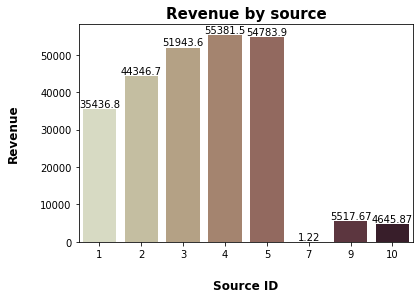

In [105]:
ax = sns.barplot(x="source_id",y="revenue" ,palette="ch:.50", data=sources_revenue)
ax.bar_label(ax.containers[0])
ax.set_title("Revenue by source",weight='bold',size=15)
ax.set_xlabel("Source ID", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Revenue", labelpad=20, weight='bold', size=12);

#### Description:
This graph shows our revenue by source.

Our highest revenue comes from source 4, followed by sources 5 and 3.

This is interesting due to the fact source 3 costs more than source 4 and 5 combined! 

((source3)141,321 > 61,073(source4) + 51,757(source5))


plotting costs per source over time

In [106]:
figure = px.line(expenses, x="date", y="costs", color='source_id',title='Costs per source over time')
figure.update_layout(
    title={
        'text': "Costs per source over time",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
figure.show()

##### Description & Conclusion
**Note - This graph is interactive and a source can be hidden / showed on the graph by clicking on it in the legend.

This graph shows our sources costs over time.

We see source 3 is our most expensive source with total costs of 141321,

Sources 9 and 10 have the lowest cost by a margin with 5517 and 5822.

By looking at our graph and watching the sources costs over time seperately, we can see all sources costs spiked at the end of november-  start of december, which correlates with our DAU, WAU and MAU.

Our low costs are around June-Aug 2017 for all sources.

Our overall expenses are 329131.62

our overall revenue is 252057.

Source 3 costs alot and doesnt justify it by revenue.

- **How much did customer acquisition from each of the sources cost?**

#### CAC by months

In [107]:
expenses['cost_month'] = expenses['date'].astype('datetime64[M]')

calculating expenses per month 

In [108]:
expenses_by_month=expenses.groupby(['cost_month'])['costs'].sum().reset_index()

calculating buyers per month

In [109]:
buyers_per_month=new_orders.groupby(['first_order_month'])['uid'].nunique().reset_index()
buyers_per_month.columns=['cost_month','buyers']

calculating and showing our df with monthly CAC

In [110]:
CAC_per_month=expenses_by_month.merge(buyers_per_month,how='left',on=['cost_month'])
CAC_per_month['CAC']=CAC_per_month['costs']/CAC_per_month['buyers']
CAC_per_month.head()

cost_month     costs  buyers        CAC
0 2017-06-01  18015.00    2023   8.905091
1 2017-07-01  18240.59    1923   9.485486
2 2017-08-01  14790.54    1370  10.796015
3 2017-09-01  24368.91    2581   9.441654
4 2017-10-01  36322.88    4340   8.369327

In [111]:
fig = px.line(CAC_per_month, x="cost_month", y="CAC", title='CAC')
fig.update_layout(
    title={
        'text': "CAC",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

##### Description
This graph shows our monthly CAC over our timeline. 
We can see our highest CAC was at Aug-2017 with value of 10.79 which correlates with our DAU, that showed our low amount of users around Aug-2017.

We see a drop in our CAC from our peak at Aug-2017 to Oct-2017, and another major drop from Apr-2018 to May-2018.

#### CAC per source

calculating expenses by month by source

In [138]:
expenses.head()

source_id       date  costs cost_month
0          1 2017-06-01  75.20 2017-06-01
1          1 2017-06-02  62.25 2017-06-01
2          1 2017-06-03  36.53 2017-06-01
3          1 2017-06-04  55.00 2017-06-01
4          1 2017-06-05  57.08 2017-06-01

per source:

In [134]:
expenses_by_source = expenses.groupby(['source_id'])['costs'].sum().reset_index()
buyers_per_source=new_orders2.groupby(['first_source'])['uid'].nunique().reset_index()
buyers_per_source.columns=['source_id','buyers']
CAC_per_source=expenses_by_source.merge(buyers_per_source,how='left',on=['source_id'])
CAC_per_source['CAC']=CAC_per_source['costs']/CAC_per_source['buyers']
CAC_per_source

source_id      costs  buyers        CAC
0          1   20833.27    3343   6.231908
1          2   42806.04    3537  12.102358
2          3  141321.63   10109  13.979783
3          4   61073.60   10015   6.098213
4          5   51757.10    7164   7.224609
5          9    5517.49    1049   5.259762
6         10    5822.49    1305   4.461678

per month per source:

In [135]:
expenses_by_month_source=expenses.groupby(['cost_month','source_id'])['costs'].sum().reset_index()

In [136]:
buyers_per_month_source=new_orders2.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
buyers_per_month_source.columns=['cost_month','source_id','buyers']

Calculating and showing CAC per month per source

In [137]:
CAC_per_month_source=expenses_by_month_source.merge(buyers_per_month_source,how='left',on=['cost_month','source_id'])
CAC_per_month_source['CAC']=CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source.head()

cost_month  source_id    costs  buyers        CAC
0 2017-06-01          1  1125.61     215   5.235395
1 2017-06-01          2  2427.38     231  10.508139
2 2017-06-01          3  7731.65     627  12.331180
3 2017-06-01          4  3514.80     401   8.765087
4 2017-06-01          5  2616.12     392   6.673776

calculating overall average CAC per source:

In [116]:
overall_CAC_source = CAC_per_month_source.groupby('source_id')['CAC'].mean().reset_index()
overall_CAC_source

source_id        CAC
0          1   6.275701
1          2  12.420524
2          3  14.284566
3          4   6.624759
4          5   7.203276
5          9   5.632814
6         10   4.920234

In [117]:
fig = px.line(CAC_per_month_source, x="cost_month", y="CAC",color='source_id',title='CAC per source over time')
fig.update_layout(
    title={
        'text': "CAC per source over time",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

##### Description & conclusion:
This graph shows CAC per source over time.

We see a raise in CAC for most sources around Aug-2017, like we saw in our overall monthly CAC.

The source with the highest overall CAC is source 3 with average CAC of 14.28, followed by source 2 with average CAC of 12.42.

source 3 having the highest CAC makes sense due to its very high costs.

Our lowest CAC comes from source 10 with a value of 4.92.


- **How worthwhile where the investments? (ROI)**

#### ROI per monthly cohort

merging CAC and LTV to calculate ROI

In [118]:
CAC_per_month_ROI=CAC_per_month[['cost_month','CAC']]
CAC_per_month_ROI.columns=['first_order_month','CAC']
ROI=ltv_cohort.merge(CAC_per_month_ROI,on=['first_order_month'],how='left')
ROI.head()

first_order_month      month  revenue  cohort_size  age       ltv       CAC
0        2017-06-01 2017-06-01  9557.49         2023  0.0  4.724414  8.905091
1        2017-06-01 2017-07-01   981.82         2023  1.0  0.485329  8.905091
2        2017-06-01 2017-08-01   885.34         2023  2.0  0.437637  8.905091
3        2017-06-01 2017-09-01  1931.30         2023  3.0  0.954671  8.905091
4        2017-06-01 2017-10-01  2068.58         2023  4.0  1.022531  8.905091

In [119]:
ROI['ROI']=ROI['ltv']/ROI['CAC']
roi_piv = ROI.pivot_table(
    index='first_order_month', columns='age', values='ROI', aggfunc='mean'
).cumsum(axis=1).round(2) 

plotting heatmap to show ROI per cohort

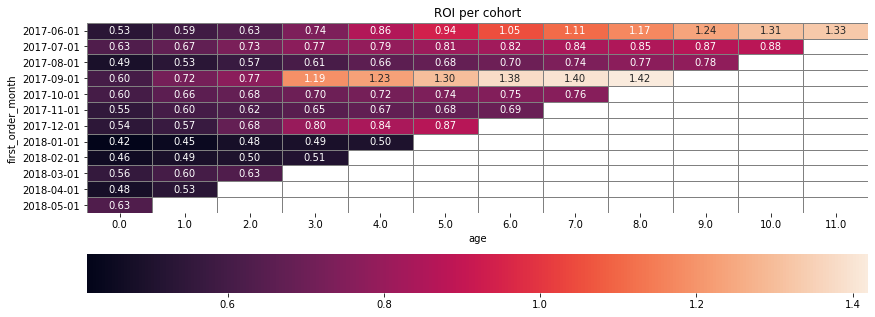

In [120]:
roi_piv.index=roi_piv.index.astype(str)
plt.figure(figsize=(14,5))
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI per cohort')
plt.show()

##### Description
This graph shows our ROI per monthly cohort, and we see that no cohort has a positive (>1) ROI until its 4th month.

Our first cohort's ROI is gradually increasing, and becomes profitable after 6 months.

Sept-2017's cohort gets profitable after 4 months and continues to grow.

Overall trend is increasing, but only 2 cohorts reached 1 and surpassed it.

Both profitable cohorts in terms of ROI became profitable at December, we will take that into account when generating final conclusions.

#### ROI per source

In [121]:
ltv_per_source=new_orders2.groupby(['first_source'])['uid','revenue'].agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_per_source.columns=['source_id','buyers','revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers']
ltv_per_source

source_id  buyers   revenue        ltv
0          1    3343  35436.83  10.600308
1          2    3537  44346.68  12.537936
2          3   10109  51943.55   5.138347
3          4   10015  55381.50   5.529855
4          5    7164  54783.88   7.647108
5          7       1      1.22   1.220000
6          9    1049   5517.67   5.259933
7         10    1305   4645.87   3.560054

calculating ROI per source (ROMI):

In [122]:
roi_per_source=expenses_per_source.merge(ltv_per_source,on=['source_id'])
roi_per_source['cac']=roi_per_source['costs']/roi_per_source['buyers']
roi_per_source['romi']=roi_per_source['ltv']/roi_per_source['cac']
roi_per_source

source_id      costs  buyers   revenue        ltv        cac      romi
0          1   20833.27    3343  35436.83  10.600308   6.231908  1.700973
1          2   42806.04    3537  44346.68  12.537936  12.102358  1.035991
2          3  141321.63   10109  51943.55   5.138347  13.979783  0.367556
3          4   61073.60   10015  55381.50   5.529855   6.098213  0.906799
4          5   51757.10    7164  54783.88   7.647108   7.224609  1.058480
5          9    5517.49    1049   5517.67   5.259933   5.259762  1.000033
6         10    5822.49    1305   4645.87   3.560054   4.461678  0.797918

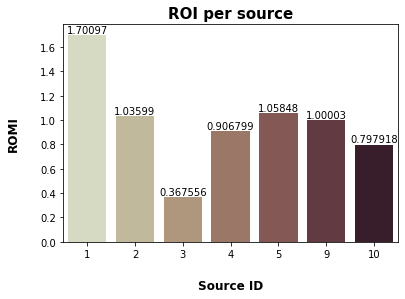

In [123]:
ax = sns.barplot(x="source_id",y="romi" , palette="ch:.50", data=roi_per_source)
ax.bar_label(ax.containers[0])
ax.set_title("ROI per source",weight='bold',size=15)
ax.set_xlabel("Source ID", labelpad=20, weight='bold', size=12)
ax.set_ylabel("ROMI", labelpad=20, weight='bold', size=12);

##### Description & conclusion:
This graph shows the ROMI of each source.

We see our most profitable source by a margin is source1(1.7) , followed by source 5(1.05) and source 2(1.03).

our least profitable source is source 3, with ROMI of 0.36.

After knowing what sources are more profitable and what sources are less profitable, we check the amount of devices per source

In [124]:
visits.groupby('source_id')['device'].value_counts()

source_id  device 
1          desktop    25901
           touch       8220
2          desktop    35661
           touch      11965
3          desktop    65776
           touch      19833
4          desktop    67640
           touch      34154
5          desktop    50069
           touch      16836
6          desktop        5
           touch          1
7          desktop       28
           touch          8
9          desktop    10118
           touch       3158
10         desktop     7367
           touch       2658
Name: device, dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>General conclusions & recommendations</h2>
</div>

To summarize, we concluded many conclusions regarding different aspects of the data:

In the data's preparation & processing stage:
- all columns that contain space in their name (visits.start ts, visits.end ts, visits.source id, orders.buy ts) have their space replaced with _

- All the date columns (visits.start ts, visits.end ts, orders.Buy ts, expenses.dt) are not in date type have changed from object to date type to have fitting type & for optimization.


In the Metrics calculations stage:

Product:

- average Daily unique users (DAU) - 907
- average weekly unique users (WAU) - 5724
- average monthly unique users (MAU) - 23228
- our peak amount of visitors happend at the end of November.
- A concluded behaviour is - more visitors use the app at the end of the year and at the start of the year.
- average sessions per day - 987
- the amount of sessions correlates with the amount of unique users, 
- as the average amount of session per user per day is 1.08.
- the most common session length is 1 minute.

Sales:

- our vast majority of customers were converted in 0 days - they purchase on their first day.
- Our overall converstion rate is 16%.

- Our average purchase size is 4.99.
- the cohort of September 2017 (09/2017) has the best average purchase size, especially from its third month (11/2017).
- The cohort of September 2017 (09/2017) has the best cumulative LTV after 2 months and on.

Marketing:
- Total marketing expenses: 329131.62

- Source 3 is the most expensive source with costs of 141321.63.

- Source 9 is the cheapest source with costs of 5517

- Source 4 is the source with the highest revenue of 55381.50

- our total revenue from all sources is 252057.

- Our highest customer acqusition cost (CAC) happend on Aug-2017 - 10.79

- Our highest customer acqusition cost belongs to source 3 - 14.28

- Our lowest customer acqusition cost belongs to source 10 - 4.9

- All cohorts aren't profitable atleast until their 4th month.
- The cohorts that yield the best ROI are the cohort of September 2017(09/2017), 
  followed by the cohort of June 2017(06/2017).

- The source with the best return on marketing investment (ROMI) is source 1, with a value of 1.7(170%)
- The source with the worst ROMI is source 3, with value of 0.36(36%).

- Desktop device yields a much bigger amount of users for all sources.

Recommendations:

- Source 1 is our most profitable source, as its ROMI is by far our best (1.7)

- We should follow the cohort of september 2017 and try to reproduce it, 
  as it was our best cohort in terms of the average sale size and the cumulative LTV.

- Source 3 is the most expensive and yet the least profitable source and we should cut it out or atleast invest much less in it.

- Emphasizing the importance of cutting source 3 - without considering source 3, we are in profit: 

  total costs(329131) - source3(141321) = new total costs(187,810) < total revenue (252057)

- We should  heavily increase the invest & flow on source 1, as its buyers amount is relatively low (3343) and its our only     source with major profits.